In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("diabetes.csv")
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
seker_hastalari=data[data.Outcome==1]
saglikli_insanlar=data[data.Outcome==0]

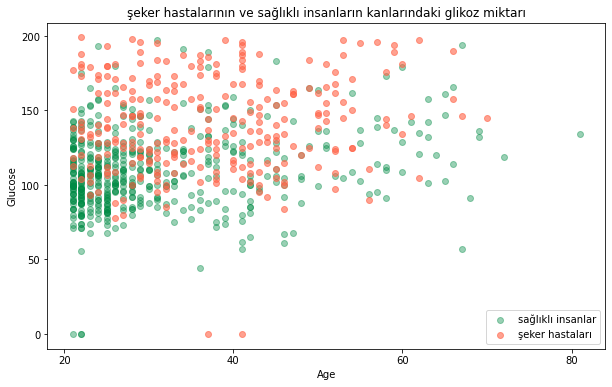

In [97]:
plt.figure(figsize=(10,6))
plt.title("şeker hastalarının ve sağlıklı insanların kanlarındaki glikoz miktarı")
plt.scatter(saglikli_insanlar.Age,saglikli_insanlar.Glucose,label="sağlıklı insanlar",color="#008b45",alpha=0.4)# alpha : koyuluk oranı
plt.scatter(seker_hastalari.Age,seker_hastalari.Glucose,color="#ff6347",label="şeker hastaları",marker="o",alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend(loc="lower right")
plt.xticks([20,40,60,80])
plt.yticks([0,50,100,150,200])
plt.savefig('knnPlot.png')#,dpi=100)
plt.show()


In [130]:
y=data.Outcome.values
x_hamveri=data.drop("Outcome",axis=1)

In [131]:
x = (x_hamveri-np.min(x_hamveri))/(np.max(x_hamveri)-np.min(x_hamveri))

In [136]:
print("\nnormalizasyondan önce veri :\n")
x_hamveri.head()


normalizasyondan önce veri :



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [137]:
print("\nnormalizasyondan sonra veri :\n")
x.head()


normalizasyondan sonra veri :



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [165]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [166]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

print ("K = 3 için Test verilerimizin doğrulama testi sonucu : ",knn.score(x_test,y_test))

K = 3 için Test verilerimizin doğrulama testi sonucu :  0.7857142857142857


In [167]:
prediction = knn.predict(x_test) # tahminleri görmek için kullanolıyor.
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [180]:

max,y=0,0
for i in range(1,11):
    
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    if max<knn.score(x_test,y_test):max,y=knn.score(x_test,y_test),i
    print("K=",i,"için doğruluk %",knn.score(x_test,y_test)*100)
    
print("-"*70+"\n"*2+"K=",y,"en iyi sonucu verdi : %",max*100)

K= 1 için doğruluk % 69.48051948051948
K= 2 için doğruluk % 74.02597402597402
K= 3 için doğruluk % 78.57142857142857
K= 4 için doğruluk % 75.97402597402598
K= 5 için doğruluk % 79.87012987012987
K= 6 için doğruluk % 79.22077922077922
K= 7 için doğruluk % 81.16883116883116
K= 8 için doğruluk % 79.22077922077922
K= 9 için doğruluk % 78.57142857142857
K= 10 için doğruluk % 79.22077922077922
----------------------------------------------------------------------

K= 7 en iyi sonucu verdi : % 81.16883116883116


In [105]:
import seaborn as sns

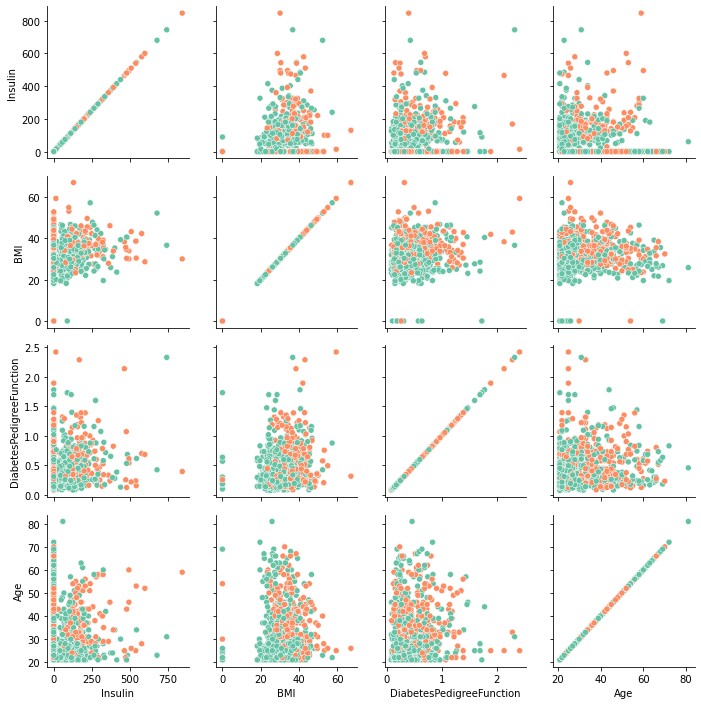

In [125]:

g=sns.PairGrid(data.iloc[:,4:],palette="Set2",hue="Outcome",height=2.5)
g.map(sns.scatterplot);
g.savefig("multiScatter.png")
